In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.DataFrame(pd.read_csv("/Users/sravanisaadhu/Desktop/Test.csv",encoding='latin-1'))

In [3]:
df.head()

,COMPANY: LEAGUE,COMPANY: ACTIVE DIRECTORS,COMPANY: ALL DIRECTORS,WHO: AVERAGE AGE,WHO: % WOMEN,WHO: % INSIDERS,WHO: % CEOS,WHO: % SMART PEOPLE,WHO: % CONNECTED TO EACH OTHER,WHO: NETWORK POWER,...,PERFORMANCE: % ALL STARS,PERFORMANCE: % STARTERS,PERFORMANCE: % ROTATION,PERFORMANCE: % BENCH,PERFORMANCE: % ROOKIES,PERFORMANCE: INFLUENCE WEIGHTED WIN RATE,PERFORMANCE: INFLUENCE WEIGHTED EBITDA WIN RATE,PERFORMANCE: INFLUENCE WEIGHTED TSR WIN RATE,PERFORMANCE: INFLUENCE WEIGHTED CARBON WIN RATE,PERFORMANCE: INFLUENCE WEIGHTED CONTROVERSY WIN RATE
0,3,13,18,65.0,23.0,8.0,69.0,77.0,46.0,1.908540e+14,...,7,13,77,0,2,0.488,0.694,0.410,0.617,0.227
1,3,11,16,59.0,36.0,9.0,91.0,82.0,45.0,1.908540e+14,...,0,0,38,62,0,0.303,0.295,0.297,0.660,0.116
2,2,12,13,60.0,38.0,31.0,69.0,69.0,0.0,1.488540e+14,...,0,0,57,43,0,0.431,0.517,0.402,0.644,0.198
3,2,15,24,56.0,0.0,13.0,40.0,40.0,0.0,1.324070e+14,...,0,49,6,1,44,0.339,0.395,0.070,0.098,0.511
4,1,9,11,70.0,33.0,56.0,33.0,78.0,67.0,1.324070e+14,...,0,57,42,0,1,0.552,0.749,0.529,0.141,0.670


In [4]:
df.columns

Index(['COMPANY: LEAGUE', 'COMPANY: ACTIVE DIRECTORS',
       'COMPANY: ALL DIRECTORS', 'WHO: AVERAGE AGE', 'WHO: % WOMEN',
       'WHO: % INSIDERS', 'WHO: % CEOS', 'WHO: % SMART PEOPLE',
       'WHO: % CONNECTED TO EACH OTHER', 'WHO: NETWORK POWER',
       'INFLUENCERS: BOARD TYPE', 'INFLUENCERS: HIGHEST INFLUENCE %',
       'INFLUENCE: AGE', 'INFLUENCE: FEMALE', 'INFLUENCE: GENDER POWER GAP',
       'INFLUENCE: INSIDERS', 'INFLUENCE: CEOS / EX CEOS',
       'INFLUENCE: SMARTIES', 'INFLUENCE: CONNECTED DIRECTORS',
       'INFLUENCE: PAY COMMITTEE', 'INFLUENCE: NOMINATING COMMITTEE',
       'INFLUENCE: AUDIT COMMITTEE', 'PERFORMANCE: % HALL OF FAMERS',
       'PERFORMANCE: % ALL STARS', 'PERFORMANCE: % STARTERS',
       'PERFORMANCE: % ROTATION', 'PERFORMANCE: % BENCH',
       'PERFORMANCE: % ROOKIES', 'PERFORMANCE: INFLUENCE WEIGHTED WIN RATE',
       'PERFORMANCE: INFLUENCE WEIGHTED EBITDA WIN RATE',
       'PERFORMANCE: INFLUENCE WEIGHTED TSR WIN RATE',
       'PERFORMANCE: INFLUENC

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9558 entries, 0 to 9557
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   COMPANY: LEAGUE                                       9558 non-null   int64  
 1   COMPANY: ACTIVE DIRECTORS                             9558 non-null   int64  
 2   COMPANY: ALL DIRECTORS                                9558 non-null   int64  
 3   WHO: AVERAGE AGE                                      9074 non-null   float64
 4   WHO: % WOMEN                                          9470 non-null   float64
 5   WHO: % INSIDERS                                       9470 non-null   float64
 6   WHO: % CEOS                                           9470 non-null   float64
 7   WHO: % SMART PEOPLE                                   9470 non-null   float64
 8   WHO: % CONNECTED TO EACH OTHER                        9470

In [6]:
df.shape

(9558, 33)

In [7]:
#checking for null values
df.isnull().sum()

COMPANY: LEAGUE                                           0
COMPANY: ACTIVE DIRECTORS                                 0
COMPANY: ALL DIRECTORS                                    0
WHO: AVERAGE AGE                                        484
WHO: % WOMEN                                             88
WHO: % INSIDERS                                          88
WHO: % CEOS                                              88
WHO: % SMART PEOPLE                                      88
WHO: % CONNECTED TO EACH OTHER                           88
WHO: NETWORK POWER                                        0
INFLUENCERS: BOARD TYPE                                  88
INFLUENCERS: HIGHEST INFLUENCE %                          0
INFLUENCE: AGE                                           88
INFLUENCE: FEMALE                                         0
INFLUENCE: GENDER POWER GAP                               0
INFLUENCE: INSIDERS                                      88
INFLUENCE: CEOS / EX CEOS               

In [8]:
df = df.fillna(df.median())

In [9]:
df.isnull().sum()

COMPANY: LEAGUE                                          0
COMPANY: ACTIVE DIRECTORS                                0
COMPANY: ALL DIRECTORS                                   0
WHO: AVERAGE AGE                                         0
WHO: % WOMEN                                             0
WHO: % INSIDERS                                          0
WHO: % CEOS                                              0
WHO: % SMART PEOPLE                                      0
WHO: % CONNECTED TO EACH OTHER                           0
WHO: NETWORK POWER                                       0
INFLUENCERS: BOARD TYPE                                 88
INFLUENCERS: HIGHEST INFLUENCE %                         0
INFLUENCE: AGE                                           0
INFLUENCE: FEMALE                                        0
INFLUENCE: GENDER POWER GAP                              0
INFLUENCE: INSIDERS                                      0
INFLUENCE: CEOS / EX CEOS                               

In [10]:
df['INFLUENCERS: BOARD TYPE'].replace(['ARISTOCRATIC', 'DEMOCRATIC', 'MONARCHY', 'OLIGARCHY', 'SOCIALIST', 'STANDARD', 'TOTALITARIAN',''],
                                          [1,2,3,4,5,6,7,0], inplace=True)

In [11]:
df=df.dropna()
df.isnull().sum()

COMPANY: LEAGUE                                         0
COMPANY: ACTIVE DIRECTORS                               0
COMPANY: ALL DIRECTORS                                  0
WHO: AVERAGE AGE                                        0
WHO: % WOMEN                                            0
WHO: % INSIDERS                                         0
WHO: % CEOS                                             0
WHO: % SMART PEOPLE                                     0
WHO: % CONNECTED TO EACH OTHER                          0
WHO: NETWORK POWER                                      0
INFLUENCERS: BOARD TYPE                                 0
INFLUENCERS: HIGHEST INFLUENCE %                        0
INFLUENCE: AGE                                          0
INFLUENCE: FEMALE                                       0
INFLUENCE: GENDER POWER GAP                             0
INFLUENCE: INSIDERS                                     0
INFLUENCE: CEOS / EX CEOS                               0
INFLUENCE: SMA

In [12]:
df.corr()["PERFORMANCE: INFLUENCE WEIGHTED WIN RATE"].sort_values()

PERFORMANCE: % BENCH                                   -0.315894
PERFORMANCE: % ROOKIES                                 -0.286713
COMPANY: ALL DIRECTORS                                 -0.144982
PERFORMANCE: % ROTATION                                -0.080751
COMPANY: ACTIVE DIRECTORS                              -0.064379
COMPANY: LEAGUE                                        -0.056829
INFLUENCE: GENDER POWER GAP                            -0.037014
WHO: NETWORK POWER                                     -0.034729
INFLUENCE: AUDIT COMMITTEE                             -0.011368
WHO: % INSIDERS                                        -0.005387
INFLUENCE: FEMALE                                       0.012499
INFLUENCE: NOMINATING COMMITTEE                         0.012593
WHO: % CONNECTED TO EACH OTHER                          0.019945
INFLUENCE: CONNECTED DIRECTORS                          0.021896
INFLUENCE: AGE                                          0.028303
INFLUENCE: PAY COMMITTEE 

In [13]:
df.corr()

,COMPANY: LEAGUE,COMPANY: ACTIVE DIRECTORS,COMPANY: ALL DIRECTORS,WHO: AVERAGE AGE,WHO: % WOMEN,WHO: % INSIDERS,WHO: % CEOS,WHO: % SMART PEOPLE,WHO: % CONNECTED TO EACH OTHER,WHO: NETWORK POWER,...,PERFORMANCE: % ALL STARS,PERFORMANCE: % STARTERS,PERFORMANCE: % ROTATION,PERFORMANCE: % BENCH,PERFORMANCE: % ROOKIES,PERFORMANCE: INFLUENCE WEIGHTED WIN RATE,PERFORMANCE: INFLUENCE WEIGHTED EBITDA WIN RATE,PERFORMANCE: INFLUENCE WEIGHTED TSR WIN RATE,PERFORMANCE: INFLUENCE WEIGHTED CARBON WIN RATE,PERFORMANCE: INFLUENCE WEIGHTED CONTROVERSY WIN RATE
COMPANY: LEAGUE,1.000000,0.371006,0.378266,0.067741,0.136388,-0.116443,0.202177,0.173045,0.167741,0.247564,...,0.043223,0.061624,0.091937,0.084118,-0.221473,-0.056829,0.117814,0.164587,0.157457,-0.118693
COMPANY: ACTIVE DIRECTORS,0.371006,1.000000,0.816310,0.171004,0.066892,0.064187,0.011830,0.039902,0.130800,0.163743,...,-0.045810,0.042683,0.133272,0.116437,-0.167086,-0.064379,0.077871,0.069259,0.064331,-0.055891
COMPANY: ALL DIRECTORS,0.378266,0.816310,1.000000,0.090849,0.081861,0.001726,0.011961,0.012405,0.085119,0.132832,...,-0.076754,0.010262,0.110119,0.131871,-0.104500,-0.144982,0.016958,0.002213,0.041752,-0.122332
WHO: AVERAGE AGE,0.067741,0.171004,0.090849,1.000000,-0.016325,-0.190712,0.210079,0.123182,0.114481,0.079677,...,0.013141,0.074639,0.129546,0.059328,-0.208636,0.062979,0.183354,0.110747,0.095231,0.082039
WHO: % WOMEN,0.136388,0.066892,0.081861,-0.016325,1.000000,-0.436984,0.249455,0.327447,0.063024,0.117740,...,0.036091,0.046319,0.113839,0.052668,-0.216103,0.045328,0.075378,0.222912,0.235592,0.028692
WHO: % INSIDERS,-0.116443,0.064187,0.001726,-0.190712,-0.436984,1.000000,-0.394335,-0.411694,-0.018510,-0.104589,...,0.022638,-0.072971,-0.179078,-0.050984,0.232277,-0.005387,-0.083834,-0.282100,-0.234004,-0.016336
WHO: % CEOS,0.202177,0.011830,0.011961,0.210079,0.249455,-0.394335,1.000000,0.434572,0.192135,0.222450,...,-0.004194,0.082101,0.192465,0.084384,-0.297671,0.061612,0.129234,0.218872,0.266575,0.066114
WHO: % SMART PEOPLE,0.173045,0.039902,0.012405,0.123182,0.327447,-0.411694,0.434572,1.000000,0.227784,0.216637,...,0.003574,0.129926,0.229876,0.066264,-0.355173,0.086877,0.137009,0.355093,0.243352,0.125653
WHO: % CONNECTED TO EACH OTHER,0.167741,0.130800,0.085119,0.114481,0.063024,-0.018510,0.192135,0.227784,1.000000,0.319452,...,-0.029122,0.051684,0.108854,0.053323,-0.175165,0.019945,0.079329,0.103178,0.097712,0.001838
WHO: NETWORK POWER,0.247564,0.163743,0.132832,0.079677,0.117740,-0.104589,0.222450,0.216637,0.319452,1.000000,...,-0.041779,0.057051,0.115692,0.049633,-0.142370,-0.034729,0.054683,0.141775,0.106398,-0.088460


<AxesSubplot:>

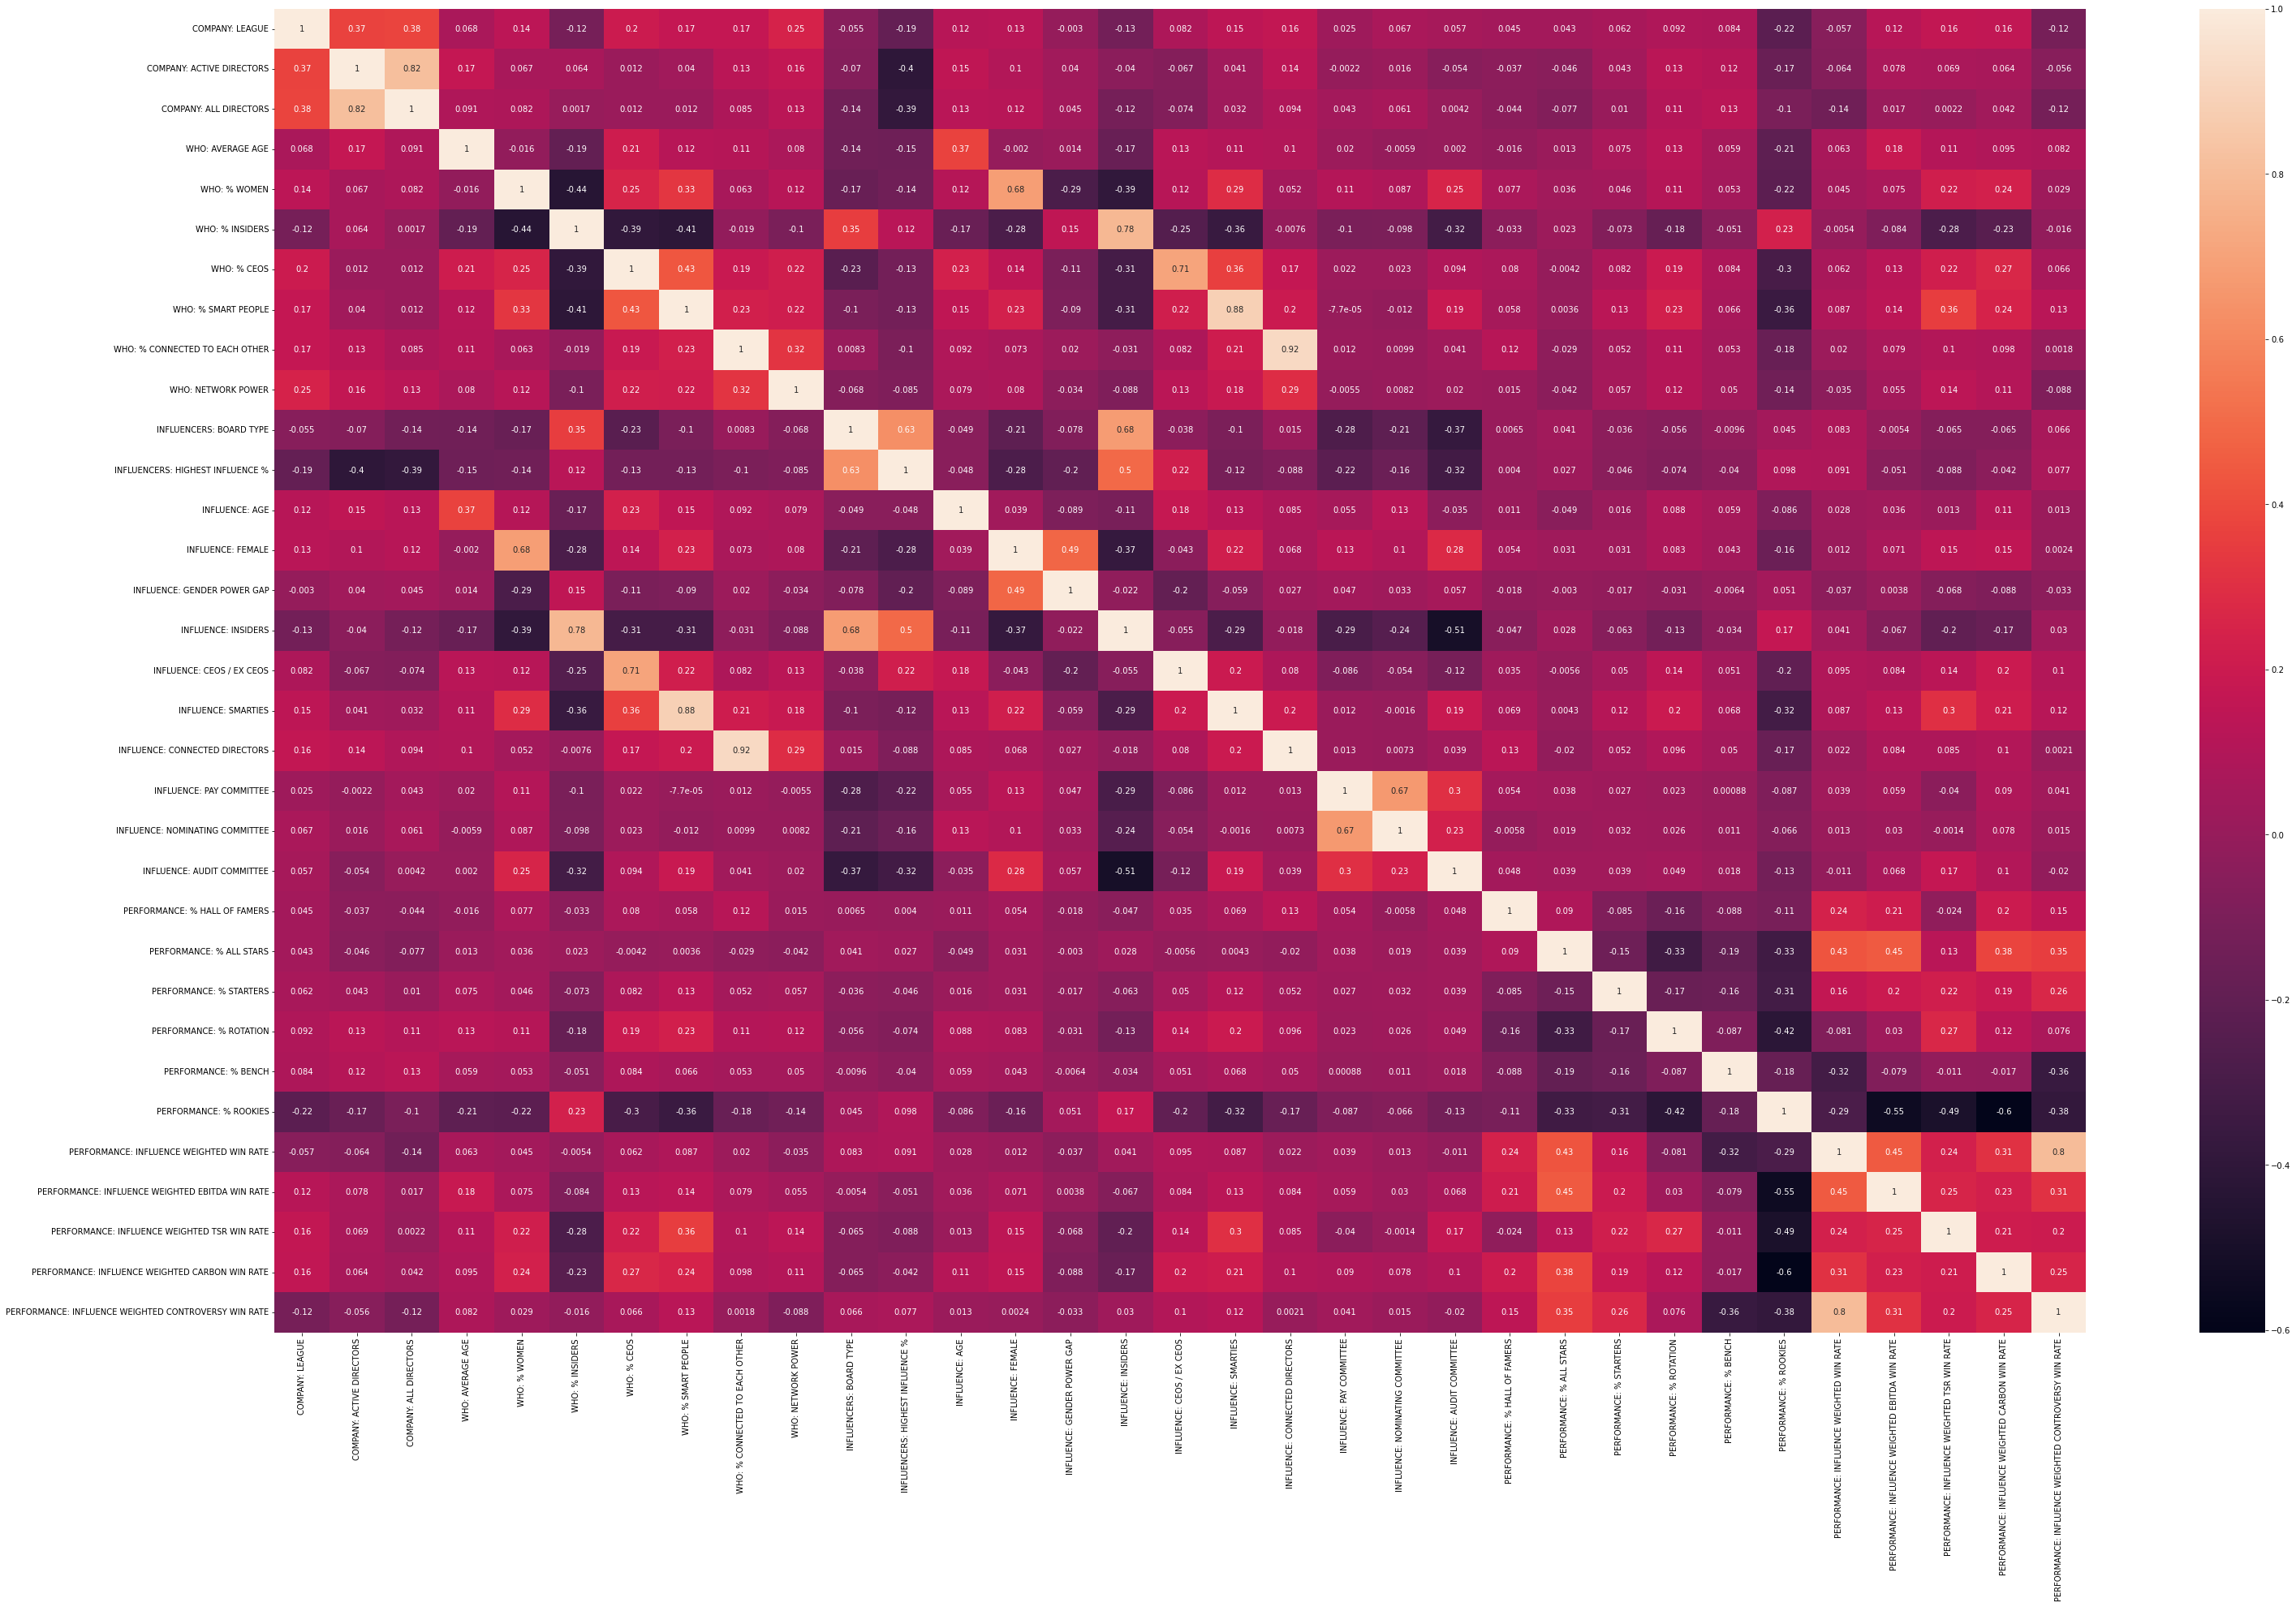

In [14]:
plt.figure(figsize = (50,30))
sns.heatmap(df.corr(),annot = True)

In [15]:
#lets extract features and targets
X=df.drop(columns=['PERFORMANCE: INFLUENCE WEIGHTED WIN RATE'])
y=df['PERFORMANCE: INFLUENCE WEIGHTED WIN RATE']

In [16]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)    

In [18]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7576, 32), (1894, 32), (7576,), (1894,))

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_test, y_pred): return confusion_matrix(y_test, y_train)[0, 0]
def fp(y_test, y_pred): return confusion_matrix(y_test, y_pred)[0, 1]
def fn(y_test, y_pred): return confusion_matrix(y_test, y_pred)[1, 0]
def tp(y_test, y_pred): return confusion_matrix(y_test, y_pred)[1, 1]

In [42]:
#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

# Regression Analysis

## Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

0.09676803746671532
0.7765601782087984
0.10045321145158286
0.766602790586479


In [52]:
scores = cross_validate(lr, X_train, y_train, 
                        scoring=['neg_mean_squared_error','neg_mean_absolute_error'],cv=10)

In [53]:
scores=pd.DataFrame(scores)

In [54]:
scores.mean()

fit_time                        0.007252
score_time                      0.001415
test_neg_mean_squared_error    -0.009298
test_neg_mean_absolute_error   -0.073249
dtype: float64

# Ridge Regression

In [24]:
from sklearn.linear_model import Ridge

In [25]:
ridge_regression = Ridge(alpha=0.01) 
ridge_regression

Ridge(alpha=0.01)

In [26]:
ridge_regression.fit(X_train, y_train)
pred = ridge_regression.predict(X_test)

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.7764639404585448

In [28]:
scores = cross_validate(lr, X_train, y_train, 
                        scoring=['neg_mean_squared_error','neg_mean_absolute_error'],cv=10)

In [29]:
scores=pd.DataFrame(scores)

In [30]:
scores.mean()

fit_time                        0.006334
score_time                      0.001632
test_neg_mean_squared_error    -0.009298
test_neg_mean_absolute_error   -0.073249
dtype: float64

In [31]:
ridge_regression = Ridge(alpha=100) 
ridge_regression

Ridge(alpha=100)

In [32]:
ridge_regression.fit(X_train, y_train)
pred = ridge_regression.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.7498609614843816

In [34]:
scores = cross_validate(lr, X_train, y_train, 
                        scoring=['neg_mean_squared_error','neg_mean_absolute_error'],cv=10)

In [35]:
scores=pd.DataFrame(scores)

In [36]:
scores.mean()

fit_time                        0.006842
score_time                      0.001864
test_neg_mean_squared_error    -0.009298
test_neg_mean_absolute_error   -0.073249
dtype: float64

# Lasso Regression

In [56]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

0.11889123001594179
0.6627155259994759
0.123498917943761
0.6472278328838424


In [57]:
scores = cross_validate(lr, X_train, y_train, 
                        scoring=['neg_mean_squared_error','neg_mean_absolute_error'],cv=10)
scores=pd.DataFrame(scores)
scores.mean()

fit_time                        0.007222
score_time                      0.001153
test_neg_mean_squared_error    -0.009298
test_neg_mean_absolute_error   -0.073249
dtype: float64

# Logistic Regression

In [58]:
#lets extract features and targets
X=df.drop(columns=['INFLUENCERS: BOARD TYPE'],axis=1)
y=df['INFLUENCERS: BOARD TYPE']

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)    

In [63]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7576, 32), (1894, 32), (7576,), (1894,))

In [65]:
scaler=StandardScaler()

In [66]:
scaled_X_train = scaler.fit_transform(X_train)

In [67]:
scaled_X_test = scaler.transform(X_test)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
log_model= LogisticRegression()

In [70]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [71]:
log_model.coef_

array([[-7.96161786e-01,  8.22751578e-01,  7.57604107e-02,
        -2.47219333e-01,  3.72678691e-01,  2.56838726e-01,
         1.47756504e+00,  4.19697472e-02, -9.97578773e-02,
         8.31246547e-01, -7.39075081e-01,  6.29117691e-01,
        -2.60452114e-01,  1.33443246e-01, -1.07924114e+00,
         6.79592546e-01,  1.78504803e-01,  7.84048657e-02,
         1.89502144e-01, -1.63508026e-01, -9.87567556e-02,
         7.99430282e-02,  1.49331241e-01,  2.06953157e-01,
         2.53019137e-01,  8.34766591e-02, -1.69053682e-01,
        -8.59656326e-02, -8.14464969e-03,  6.32705821e-02,
         1.46241161e-01, -3.08439626e-01],
       [ 1.09121620e-01, -9.30619493e-01, -2.36087809e-01,
        -4.69092043e-02,  2.79362593e-02,  8.56171288e-01,
        -5.55286811e-01,  1.11758704e-01, -3.50315390e-01,
         2.73846137e-01, -3.71235462e+00,  7.61832894e-02,
        -2.83779777e-01,  2.73529234e-01, -1.72080998e+00,
         1.65333706e-01, -2.91278279e-01, -6.38414287e-02,
         1.27

In [72]:
y_pred = log_model.predict(scaled_X_test)

In [74]:
accuracy_score(y_test,y_pred)

0.7444561774023232

In [75]:
confusion_matrix(y_test,y_pred)

array([[ 58,   8,   0,  26,   0,   1,   1],
       [  8, 102,   2,  96,   0,   1,   2],
       [  6,  10,   6, 101,   1,   0,  11],
       [ 11,  48,   5, 481,   0,   2,  44],
       [  1,   4,   0,   1,   1,   0,   0],
       [  0,   0,   1,  14,   0,  27,  25],
       [  1,   8,   0,  40,   0,   5, 735]])

In [90]:
from sklearn.metrics import classification_report,plot_confusion_matrix

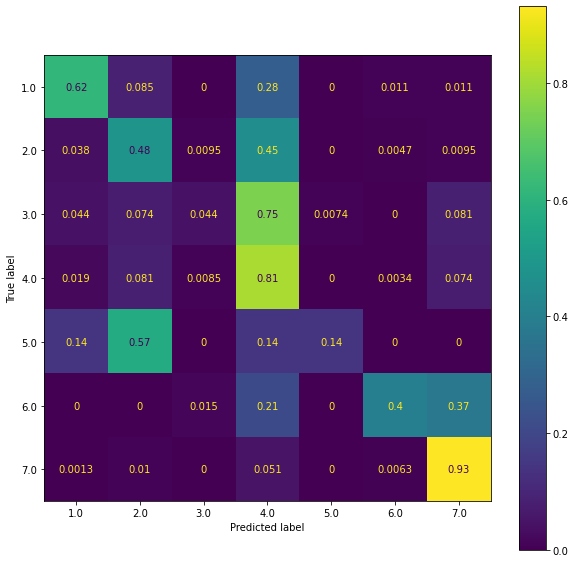

In [91]:
disp=plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')
fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.68      0.62      0.65        94
         2.0       0.57      0.48      0.52       211
         3.0       0.43      0.04      0.08       135
         4.0       0.63      0.81      0.71       591
         5.0       0.50      0.14      0.22         7
         6.0       0.75      0.40      0.52        67
         7.0       0.90      0.93      0.91       789

    accuracy                           0.74      1894
   macro avg       0.64      0.49      0.52      1894
weighted avg       0.73      0.74      0.72      1894



In [96]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

In [126]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

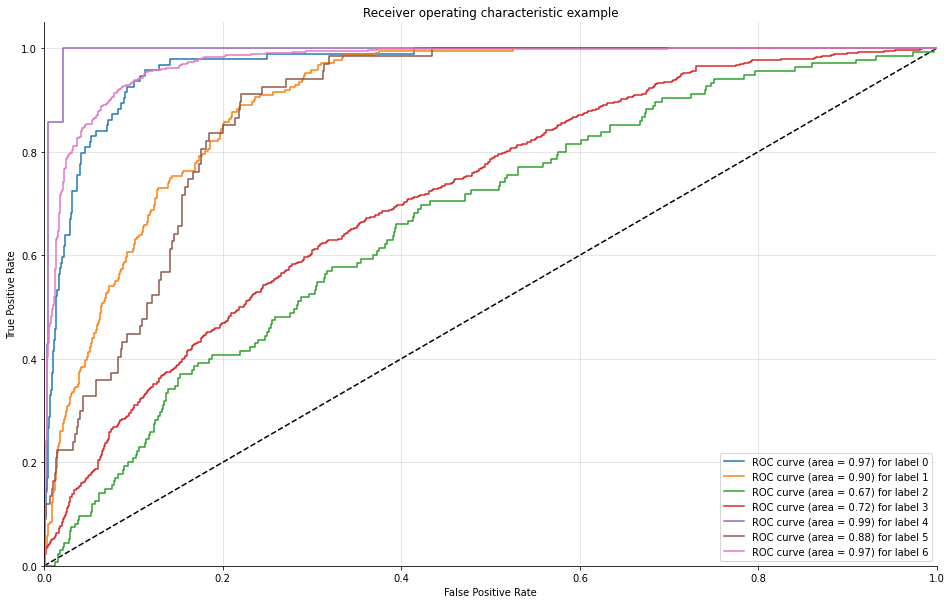

In [127]:
plot_multiclass_roc(log_model, scaled_X_test, y_test, n_classes=7, figsize=(16, 10))

In [100]:
from sklearn.model_selection import GridSearchCV

In [104]:
log_model_1=LogisticRegression(solver='saga',multi_class='ovr',max_iter=5000)

In [105]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [106]:
grid_model = GridSearchCV(log_model_1,param_grid={'C':C,'penalty':penalty})

In [107]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [108]:
grid_model.best_params_

{'C': 21.544346900318832, 'penalty': 'l2'}

In [109]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [110]:
y_pred = grid_model.predict(scaled_X_test)

In [111]:
accuracy_score(y_test,y_pred)

0.7296726504751848

In [112]:
confusion_matrix(y_test,y_pred)

array([[ 48,   6,   0,  34,   0,   0,   6],
       [  7,  65,   2, 133,   0,   2,   2],
       [  5,   8,   4, 105,   1,   0,  12],
       [  9,  31,   3, 495,   0,   0,  53],
       [  1,   4,   0,   1,   1,   0,   0],
       [  0,   1,   1,  18,   0,  20,  27],
       [  2,   7,   0,  31,   0,   0, 749]])

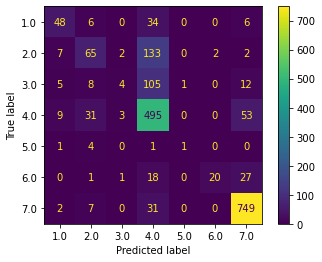

In [113]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

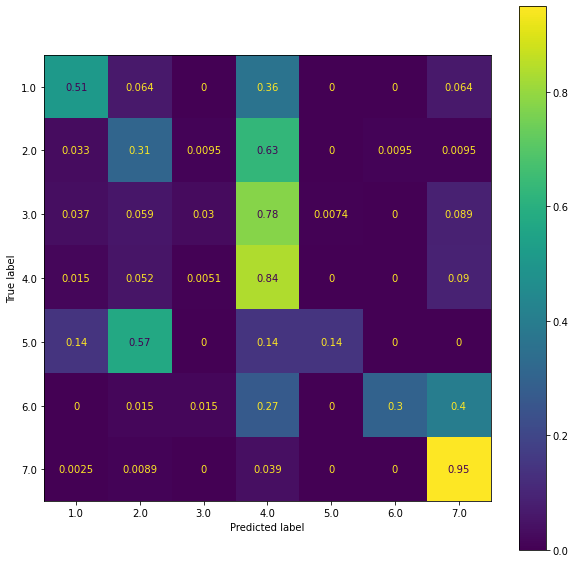

In [117]:
disp=plot_confusion_matrix(grid_model,scaled_X_test,y_test,normalize='true')
fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.67      0.51      0.58        94
         2.0       0.53      0.31      0.39       211
         3.0       0.40      0.03      0.06       135
         4.0       0.61      0.84      0.70       591
         5.0       0.50      0.14      0.22         7
         6.0       0.91      0.30      0.45        67
         7.0       0.88      0.95      0.91       789

    accuracy                           0.73      1894
   macro avg       0.64      0.44      0.47      1894
weighted avg       0.71      0.73      0.69      1894



In [119]:
from sklearn.metrics import roc_curve, auc

In [120]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

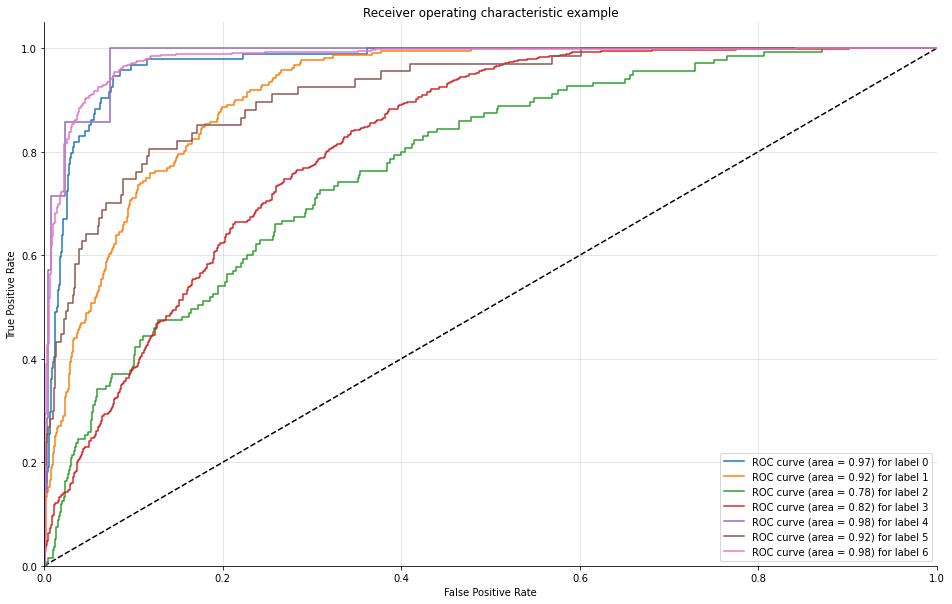

In [125]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=7, figsize=(16, 10))

# Support Vector Machine

In [130]:
from sklearn.svm import SVR,LinearSVR

In [131]:
base_model = SVR()

In [132]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [133]:
base_preds = base_model.predict(scaled_X_test)

In [134]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [135]:
mean_absolute_error(y_test,base_preds)

0.7726598795548084

In [136]:
np.sqrt(mean_squared_error(y_test,base_preds))

1.0519958469845412

In [137]:
y_test.mean()

4.881203801478352

# RandomForest

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
rfc=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=101)

In [140]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

In [141]:
preds=rfc.predict(X_test)

In [142]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

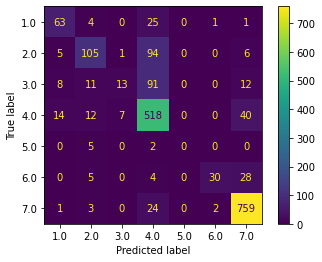

In [143]:
plot_confusion_matrix(rfc,X_test,y_test)

In [144]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         1.0       0.69      0.67      0.68        94
         2.0       0.72      0.50      0.59       211
         3.0       0.62      0.10      0.17       135
         4.0       0.68      0.88      0.77       591
         5.0       0.00      0.00      0.00         7
         6.0       0.91      0.45      0.60        67
         7.0       0.90      0.96      0.93       789

    accuracy                           0.79      1894
   macro avg       0.65      0.51      0.53      1894
weighted avg       0.78      0.79      0.76      1894



In [146]:
n_estimators=[64,100,128,200]

In [147]:
max_features=[4,8,12]

In [148]:
bootstrap=[True,False]

In [149]:
oob_score=[True,False]

In [150]:
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'bootstrap':bootstrap,
           'oob_score':oob_score}

In [152]:
rfc=RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [153]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [4, 8, 12],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [154]:
grid.best_params_

{'bootstrap': False,
 'max_features': 12,
 'n_estimators': 128,
 'oob_score': False}

In [155]:
predictions = grid.predict(X_test)

In [156]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.76      0.83      0.79        94
         2.0       0.72      0.61      0.66       211
         3.0       0.61      0.19      0.28       135
         4.0       0.73      0.86      0.79       591
         5.0       1.00      0.29      0.44         7
         6.0       0.79      0.57      0.66        67
         7.0       0.91      0.95      0.93       789

    accuracy                           0.81      1894
   macro avg       0.79      0.61      0.65      1894
weighted avg       0.80      0.81      0.79      1894



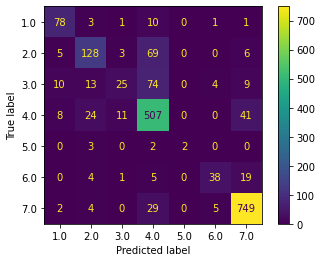

In [157]:
plot_confusion_matrix(grid,X_test,y_test)

In [158]:
grid.best_estimator_.oob_score

False

# Number of trees

In [160]:
from sklearn.metrics import accuracy_score

In [161]:
errors = []
misclassifications = []

for n in range(1,128):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=False,max_features= 12)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

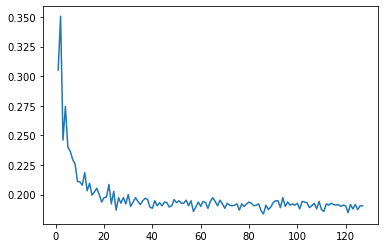

In [162]:
plt.plot(range(1,128),errors)

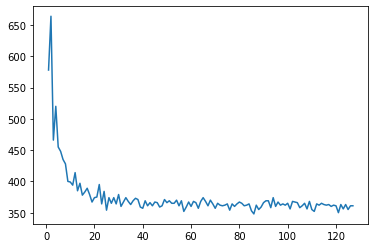

In [163]:
plt.plot(range(1,128),misclassifications)

# Gradient Boost

In [164]:
from sklearn.ensemble import GradientBoostingClassifier

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [167]:
gb_model = GradientBoostingClassifier()

In [168]:
grid = GridSearchCV(gb_model,param_grid)

In [169]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [170]:
grid.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [171]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [172]:
predictions = grid.predict(X_test)

In [173]:
predictions

array([1., 2., 2., ..., 3., 6., 4.])

In [174]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.75      0.81      0.78        94
         2.0       0.74      0.69      0.72       211
         3.0       0.53      0.21      0.31       135
         4.0       0.75      0.85      0.80       591
         5.0       0.25      0.29      0.27         7
         6.0       0.81      0.66      0.73        67
         7.0       0.93      0.95      0.94       789

    accuracy                           0.82      1894
   macro avg       0.68      0.64      0.65      1894
weighted avg       0.81      0.82      0.81      1894



In [175]:
grid.best_estimator_.feature_importances_

array([0.0097299 , 0.08861162, 0.00328682, 0.00776584, 0.00355115,
       0.02088291, 0.05703755, 0.01568696, 0.00303085, 0.04745412,
       0.2082383 , 0.00457874, 0.00558459, 0.00726401, 0.40215448,
       0.0214503 , 0.01005651, 0.0009793 , 0.01174048, 0.00523055,
       0.02023782, 0.00218298, 0.00254591, 0.00345143, 0.00389187,
       0.00187699, 0.00505811, 0.00462948, 0.00750926, 0.00481984,
       0.00386903, 0.00561231])

In [176]:
feat_import = grid.best_estimator_.feature_importances_

In [189]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [190]:
imp_feats

,Importance
COMPANY: LEAGUE,0.009730
COMPANY: ACTIVE DIRECTORS,0.088612
COMPANY: ALL DIRECTORS,0.003287
WHO: AVERAGE AGE,0.007766
WHO: % WOMEN,0.003551
WHO: % INSIDERS,0.020883
WHO: % CEOS,0.057038
WHO: % SMART PEOPLE,0.015687
WHO: % CONNECTED TO EACH OTHER,0.003031
WHO: NETWORK POWER,0.047454


In [200]:
data_1=imp_feats.sort_values("Importance",ascending=False)
data_1

,Importance
INFLUENCE: INSIDERS,0.402154
INFLUENCERS: HIGHEST INFLUENCE %,0.208238
COMPANY: ACTIVE DIRECTORS,0.088612
WHO: % CEOS,0.057038
WHO: NETWORK POWER,0.047454
INFLUENCE: CEOS / EX CEOS,0.021450
WHO: % INSIDERS,0.020883
INFLUENCE: AUDIT COMMITTEE,0.020238
WHO: % SMART PEOPLE,0.015687
INFLUENCE: PAY COMMITTEE,0.011740


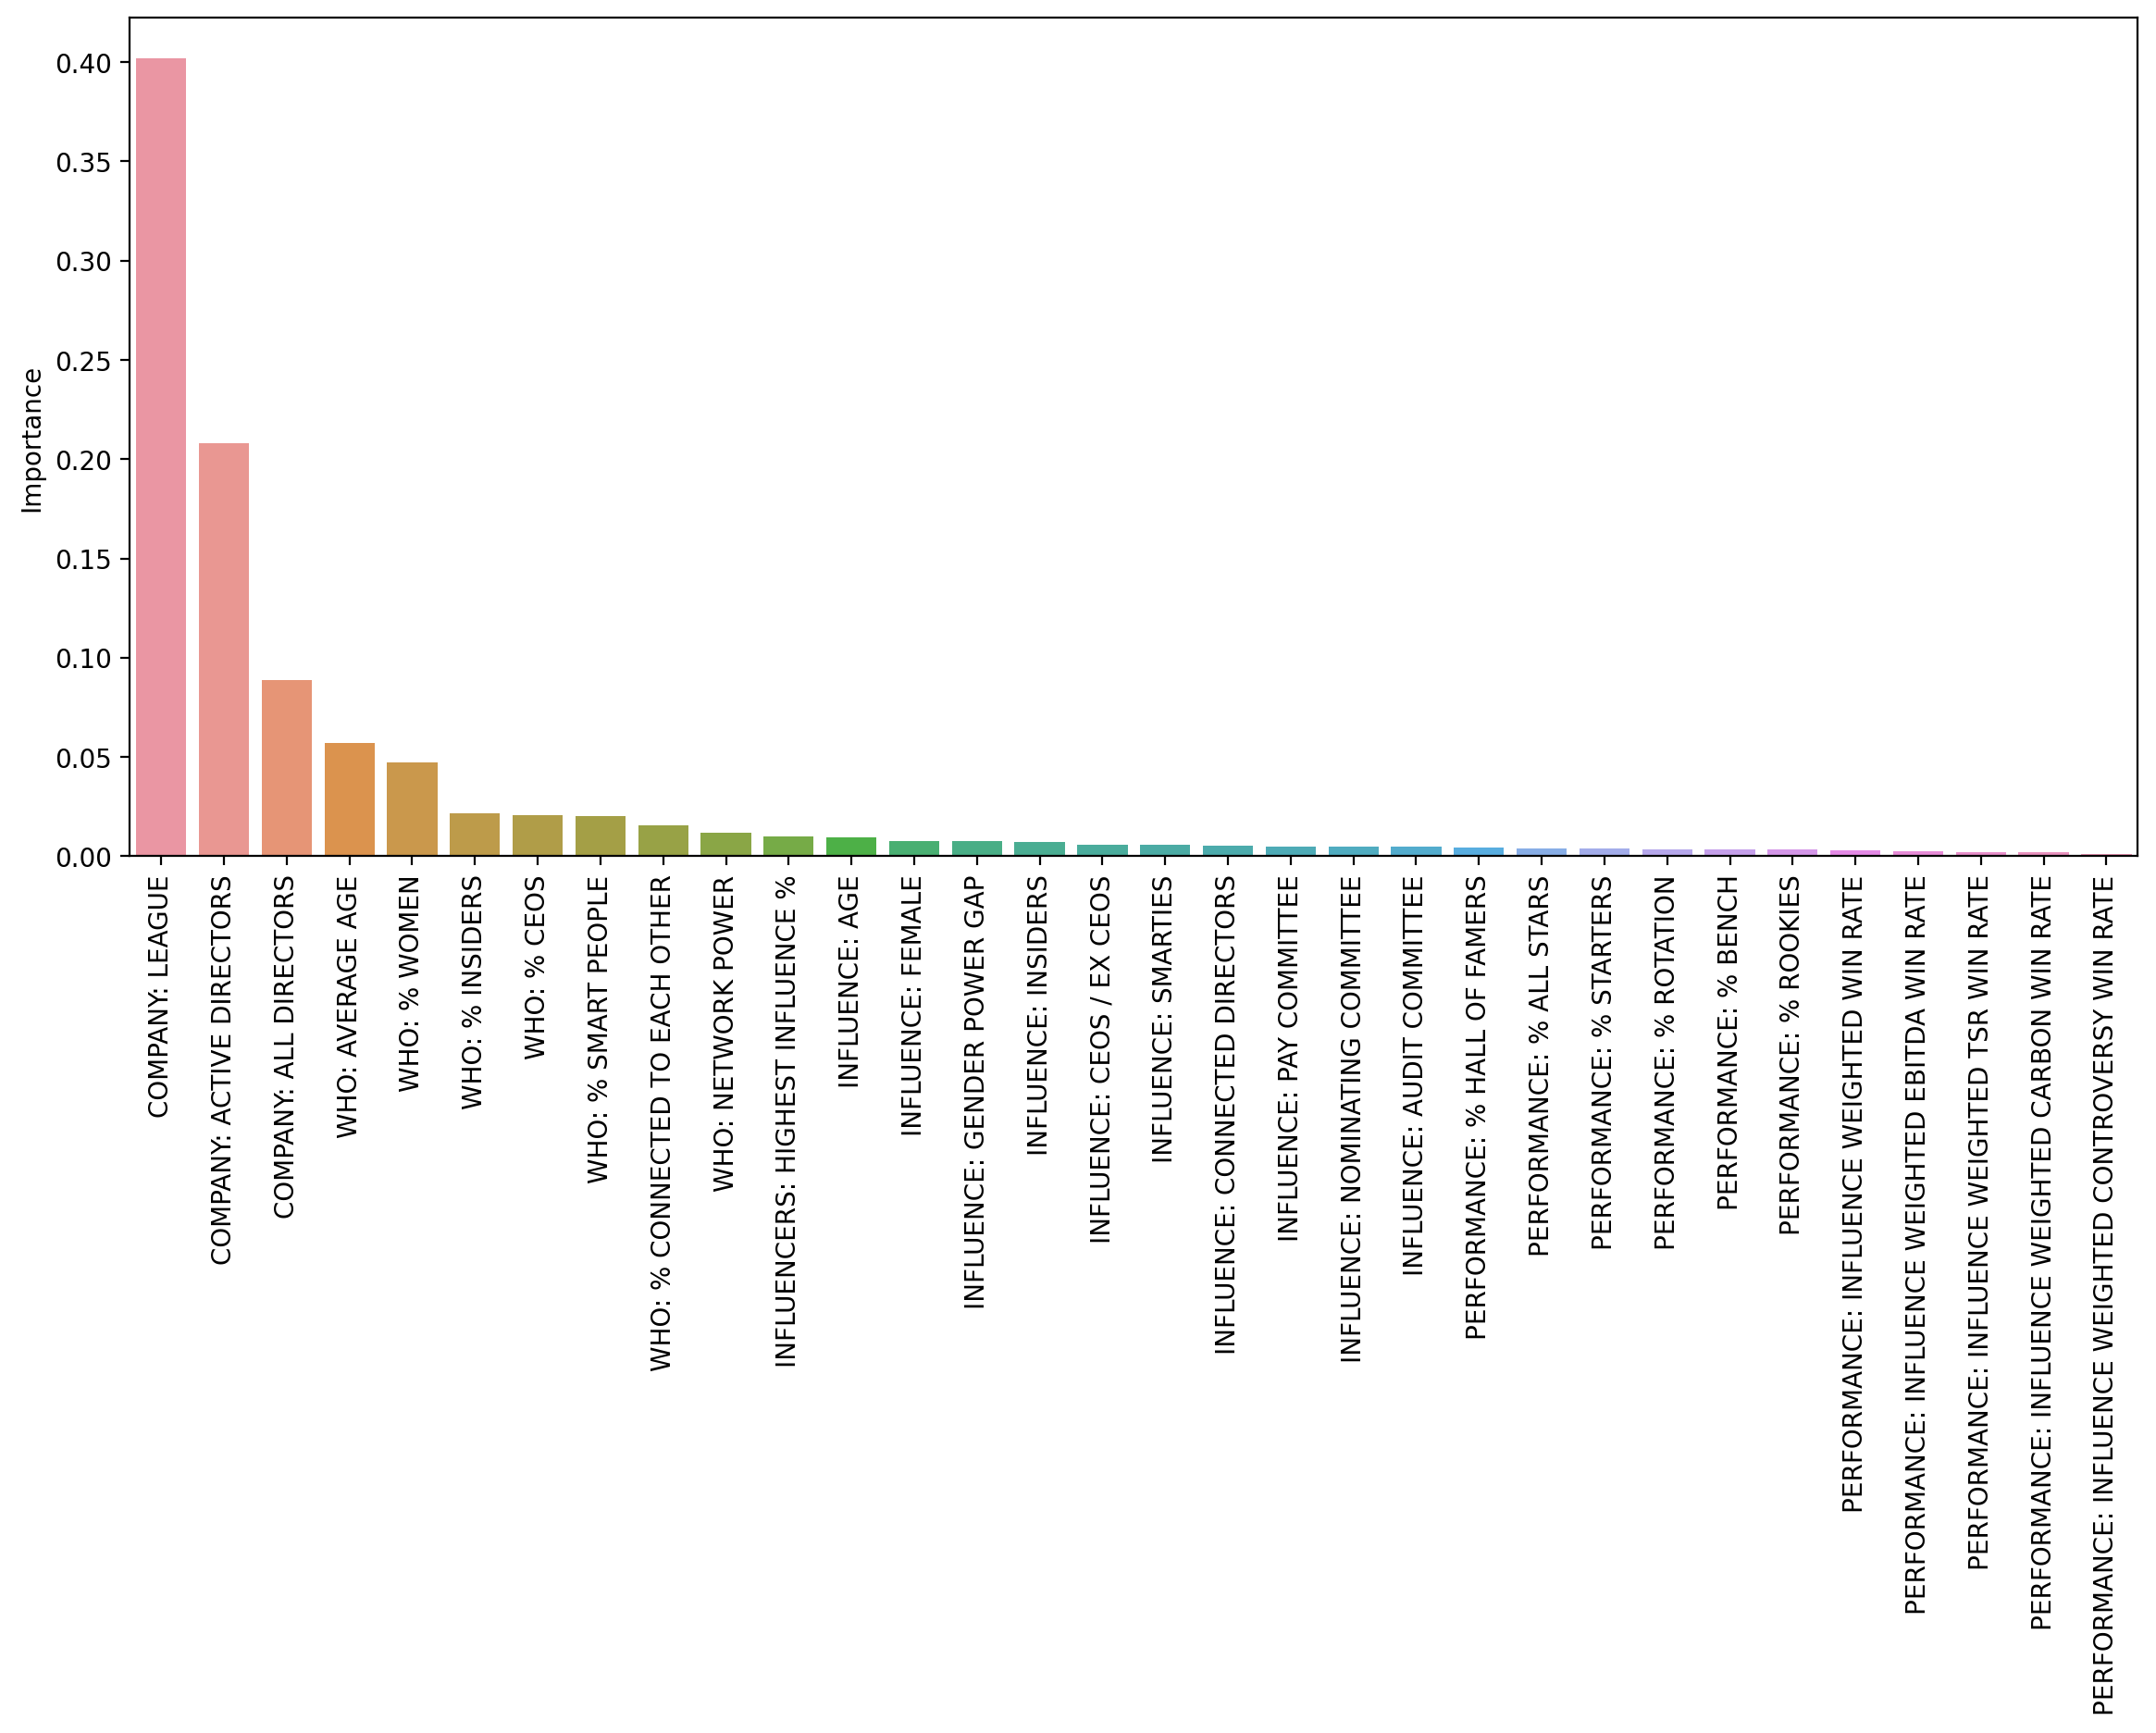

In [201]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=data_1,x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);

In [180]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,32.0,0.03125,0.07819,0.000979,0.00379,0.005598,0.016825,0.402154


In [181]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]

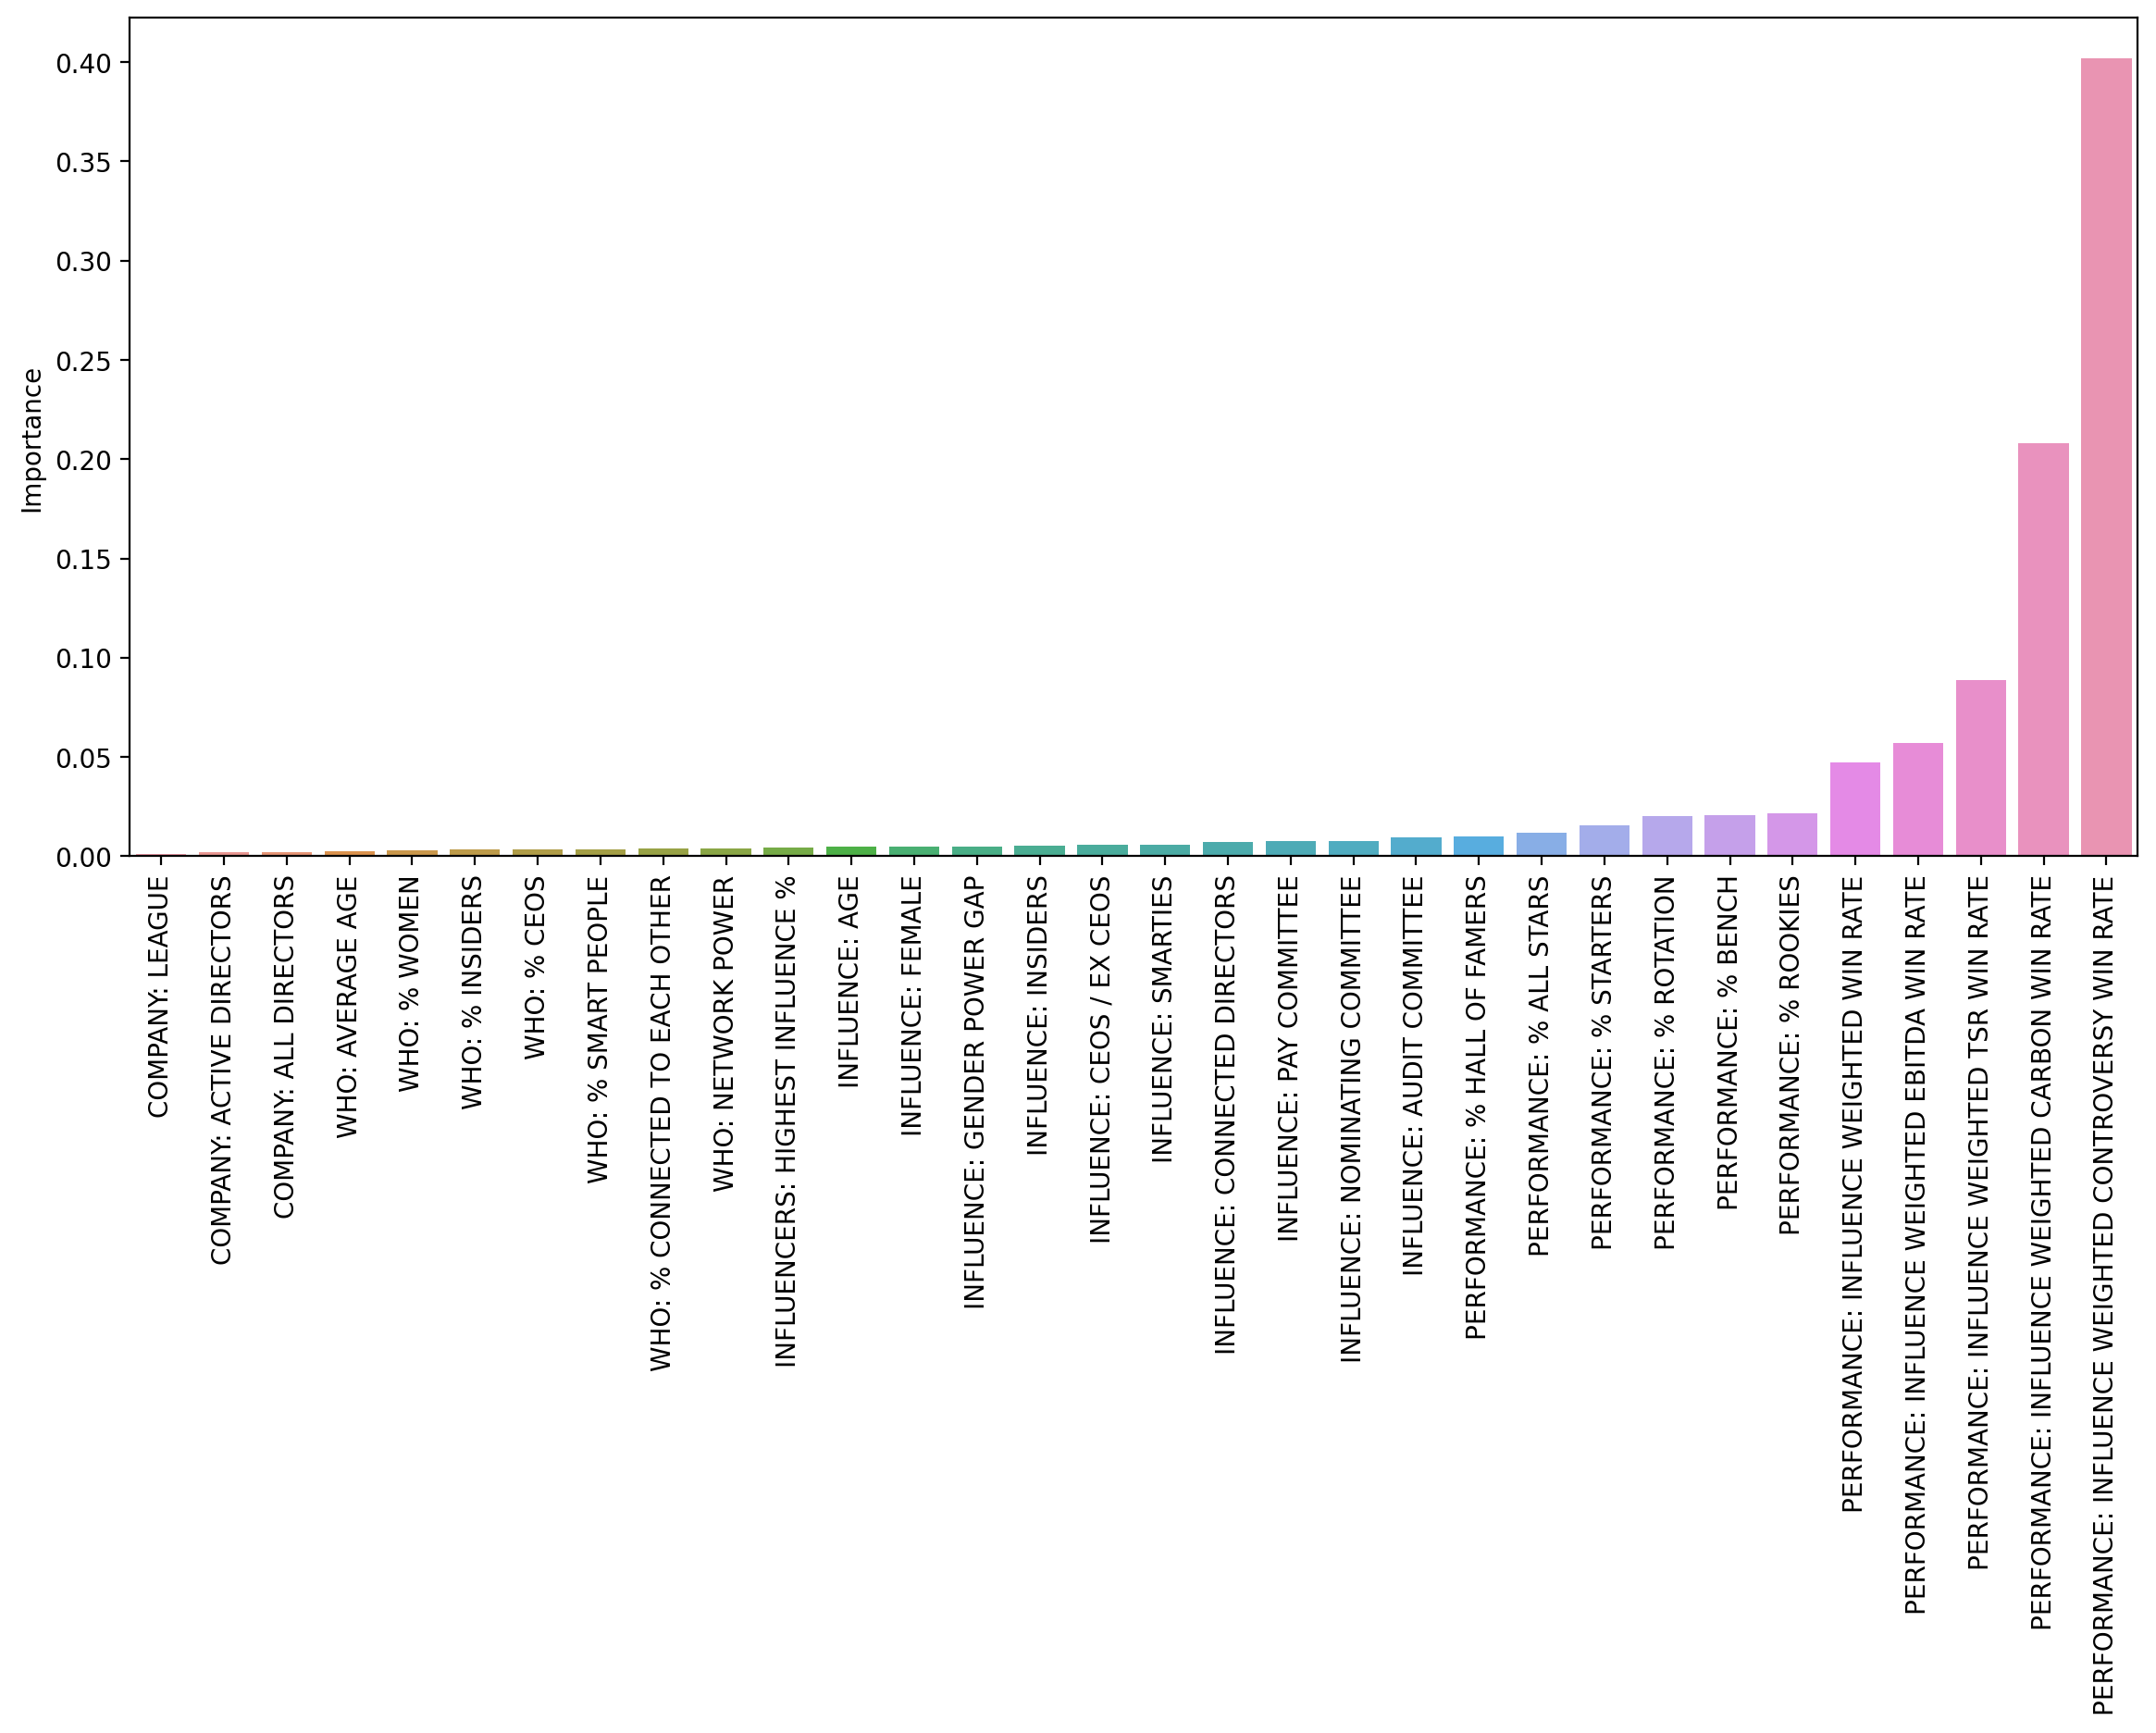

In [188]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);